In [86]:
import pandas as pd

In [87]:
import seaborn as sns

In [88]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


In [89]:
import numpy as np
import re

In [90]:
data=pd.read_csv("C:\\Users\\reauter\\Desktop\\New folder (3)\\Book1.csv")
data.drop("Name_Total",axis=1,inplace=True)

In [91]:
print(data.head())


           Name Sub_Name    code Expire Date  L.Trade  +/- %  Bid Vol  \
0      MCXMETAL      NaN  2102.0   17-Feb-21  14358.0  12.11      1.0   
1      MCXMETAL      NaN  2103.0   22-Mar-21  14826.0   7.58      4.0   
2           NaN      NaN     NaN         NaN      NaN    NaN      NaN   
3  MCXMCXCOMDEX      NaN  2102.0   24-Feb-21  14708.0  -4.41      2.0   
4  MCXMCXCOMDEX      NaN  2103.0   24-Mar-21  14728.0  -6.52      1.0   

       Bid      Ask  Ask Vol  O.Price     High      Low      Time  Volume  \
0  14356.0  14357.0     25.0  14420.0  14420.0  14322.0       NaN   414.0   
1  14825.0  14831.0      5.0  14602.0  14846.0  14584.0  18:11:07   897.0   
2      NaN      NaN      NaN      NaN      NaN      NaN       NaN     NaN   
3  14703.0  14706.0      1.0  14610.0  14721.0  14610.0  18:11:13  1675.0   
4  14726.0  14738.0      1.0  14700.0  14740.0  14645.0  18:10:34    96.0   

    O.Int  P.Close  
0   172.0  12807.0  
1   666.0  13781.0  
2     NaN      NaN  
3  1774.0  153

In [92]:
#the number of rows and columns
print(data.shape )

(56, 17)


In [93]:
#Check the duplicate value
print(data.duplicated().sum())

17


In [94]:
#To get information about null values. 
#If the zero values are low, they must be discarded
print(data.isnull().sum())
#It is necessary to study the data types of data columns.
#Understanding data types ensures that data is collected 
#in the preferred format and the value of each property is as expected.
print(data.dtypes)


Name           18
Sub_Name       46
code           18
Expire Date    18
L.Trade        19
+/- %          19
Bid Vol        19
Bid            19
Ask            20
Ask Vol        20
O.Price        20
High           20
Low            20
Time           22
Volume         20
O.Int          20
P.Close        18
dtype: int64
Name            object
Sub_Name        object
code           float64
Expire Date     object
L.Trade        float64
+/- %          float64
Bid Vol        float64
Bid            float64
Ask            float64
Ask Vol        float64
O.Price        float64
High           float64
Low            float64
Time            object
Volume         float64
O.Int          float64
P.Close        float64
dtype: object


In [95]:
#It is clear that the "Expire Date" column is given as objects instead of date format
data["Expire Date"] = pd.to_datetime(data["Expire Date"], dayfirst = True).dt.date
#Now we need to divide the Expire Date column into columns by years and months. 
#It is importanat step cause entire date is based upon year 2021
#If we divide the date into year and month we can nalyse the change in data on the basis of month
data["Year"]=pd.to_datetime(data["Expire Date"]).dt.year
data["Month"]=pd.to_datetime(data["Expire Date"]).dt.month

In [96]:
#It is necessary to study the total L.Trade over the months and put it into an understandable form
data.groupby("Month")["L.Trade"].sum()

Month
2.0    217927.70
3.0    194750.45
4.0    231264.00
5.0     69640.00
6.0     46142.00
Name: L.Trade, dtype: float64

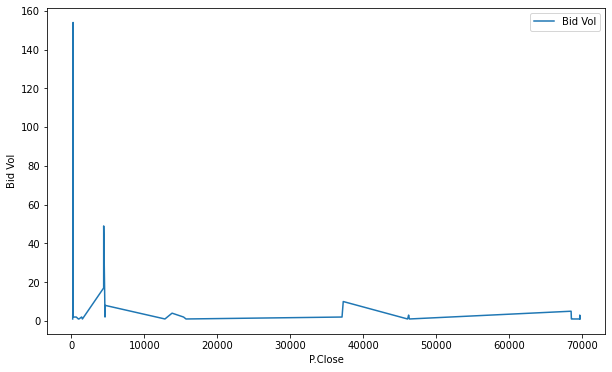

"\nPrevious close almost always refers to the prior day's final price\nof a security when the market officially closes for the day.\nWhen the Previous close is 0 then the Bid Volume is the highest.\nWhen the previous close is between 0-10000 then the Bid Volume seems to be second highest.\n\n"

In [97]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data.groupby("P.Close")["Bid Vol"].sum(),label="Bid Vol")
plt.xlabel="P.Close "
plt.ylabel="Bid Vol"
plt.title=("Bid Vol Quantity By P.Close")
plt.show()
#Interpretation
'''
Previous close almost always refers to the prior day's final price
of a security when the market officially closes for the day.
When the Previous close is 0 then the Bid Volume is the highest.
When the previous close is between 0-10000 then the Bid Volume seems to be second highest.

'''


In [98]:
data["Year"]

0     2021.0
1     2021.0
2        NaN
3     2021.0
4     2021.0
5        NaN
6     2021.0
7     2021.0
8        NaN
9     2021.0
10    2021.0
11       NaN
12    2021.0
13    2021.0
14       NaN
15    2021.0
16    2021.0
17       NaN
18    2021.0
19    2021.0
20       NaN
21    2021.0
22    2021.0
23       NaN
24    2021.0
25    2021.0
26       NaN
27    2021.0
28    2021.0
29       NaN
30    2021.0
31    2021.0
32       NaN
33    2021.0
34    2021.0
35       NaN
36    2021.0
37    2021.0
38       NaN
39    2021.0
40    2021.0
41       NaN
42    2021.0
43    2021.0
44       NaN
45    2021.0
46    2021.0
47       NaN
48    2021.0
49    2021.0
50       NaN
51    2021.0
52    2021.0
53       NaN
54    2021.0
55    2021.0
Name: Year, dtype: float64

In [99]:
data["Month"]


0     2.0
1     3.0
2     NaN
3     2.0
4     3.0
5     NaN
6     2.0
7     3.0
8     NaN
9     2.0
10    3.0
11    NaN
12    2.0
13    3.0
14    NaN
15    2.0
16    3.0
17    NaN
18    2.0
19    3.0
20    NaN
21    4.0
22    6.0
23    NaN
24    2.0
25    3.0
26    NaN
27    3.0
28    4.0
29    NaN
30    2.0
31    3.0
32    NaN
33    2.0
34    3.0
35    NaN
36    2.0
37    3.0
38    NaN
39    2.0
40    3.0
41    NaN
42    2.0
43    3.0
44    NaN
45    3.0
46    5.0
47    NaN
48    2.0
49    4.0
50    NaN
51    2.0
52    4.0
53    NaN
54    2.0
55    3.0
Name: Month, dtype: float64

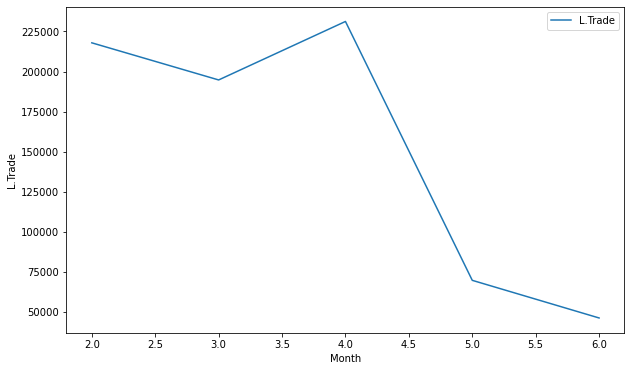

In [100]:
#It is necessary to study the total L.Trade over the months and put it into an understandable form
data.groupby("Month")["L.Trade"].sum()
plt.figure(figsize=(10,6))
sns.lineplot(data=data.groupby("Month")["L.Trade"].sum(),label="L.Trade")
plt.xlabel="Month"
plt.ylabel="L.Trade"
plt.title=("L.Trade Quantity By Month")
plt.show()


Month
2.0    14411.080000
3.0    12941.716667
4.0    57821.250000
5.0    68932.000000
6.0    46203.000000
Name: O.Price, dtype: float64


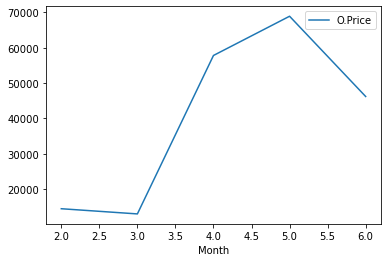

In [101]:
#It is necessary to study the average O.
#Price for months and put it into an understandable form
print(data.groupby("Month")["O.Price"].mean())
monthmean=data.groupby("Month")["O.Price"].mean().reset_index()
datamonth=monthmean.set_index("Month")
sns.lineplot(data=datamonth)
plt.xlabel="Month"
plt.ylabel="O.Price"
plt.title=("Average O.Price by months")
plt.show()

In [102]:
#Interpretation:
#On the third month the O.Price is the lowest 
#but on the 5th month the O.Price is at the peak though it gradually decreses after 5th month.



Ask Vol
1.0     334502.25
2.0     238934.55
3.0     139257.85
5.0      14823.20
25.0     14420.00
90.0      4590.00
28.0      4321.00
18.0      4257.00
4.0       1392.00
9.0        214.10
Name: O.Price, dtype: float64


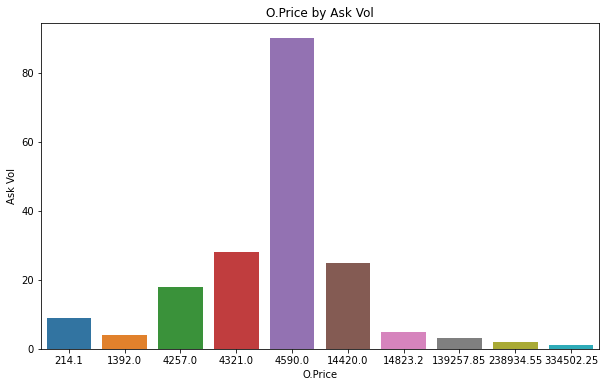

'\nAsk volume is the lowest for the O.Price 334502.25.The Ask Volume is the highest for the O.Price 4590.0.\n'

In [103]:
#
print(data.groupby("Ask Vol")['O.Price'].sum().sort_values(ascending=False))
datacategory=data.groupby("Ask Vol")['O.Price'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="O.Price",y="Ask Vol",data=datacategory).set(title="O.Price by Ask Vol")
plt.show()
#Interpretation
'''
Ask volume is the lowest for the O.Price 334502.25.The Ask Volume is the highest for the O.Price 4590.0.
'''

Name
SILVER          274531.00
GOLD            267856.00
SILVERMICRO     137800.00
MCXMCXCOMDEX     29310.00
MCXMETAL         29022.00
CRUDEOIL          8578.00
NICKEL            2778.80
CPO               2050.60
MENTHAOIL         1898.20
COPPER            1311.70
ZINC               459.70
NATURALGAS         435.30
ALUMINIUM          343.05
LEAD               337.60
CARDAMOM             0.00
Name: O.Price, dtype: float64


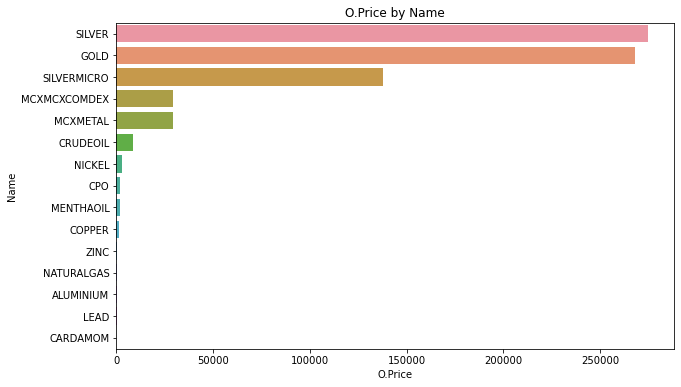

In [104]:
print(data.groupby("Name")['O.Price'].sum().sort_values(ascending=False))
datacategory=data.groupby("Name")['O.Price'].sum().sort_values(ascending=False).reset_index()  
plt.figure(figsize=(10,6))
sns.barplot(x="O.Price",y="Name",data=datacategory).set(title="O.Price by Name")
plt.show()
#SILVERMICRO 2104 has the highest O.Price in trade.
#CARDAMOM 2103 and CARDAMOM 2102 have the lowest O.Price

          Name   Volume
0  SILVERMICRO  99387.0
1   NATURALGAS  89988.0
2         GOLD  73538.0
3     CRUDEOIL  47850.0
4       SILVER  43323.0
5       COPPER  19048.0
6       NICKEL  10032.0
7         ZINC   8427.0
8         LEAD   2279.0
9    ALUMINIUM   1869.0


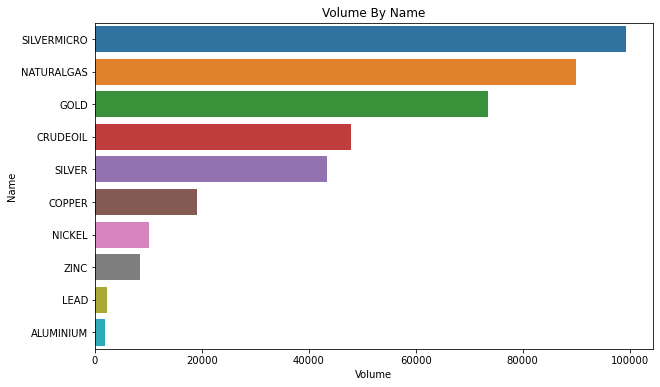

In [105]:
#Name by Volume
print(data.groupby("Name")['Volume'].sum().sort_values(ascending=False).reset_index().head(10))
datasub=data.groupby("Name")['Volume'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="Volume",y="Name",data=datasub).set(title="Volume By Name")
plt.show()
#Interpreation:
#NATURALGAS has the highest Volume in trade
#GOLD-M 2103 has the lowest volume in trade.

        Name  +/- %
0   MCXMETAL  19.69
1     COPPER   3.65
2     NICKEL   3.04
3  MENTHAOIL   1.83
4       LEAD   1.23
5  ALUMINIUM   1.19
6        CPO   0.90
7       ZINC   0.49
8   CARDAMOM   0.00
9     SILVER  -0.24


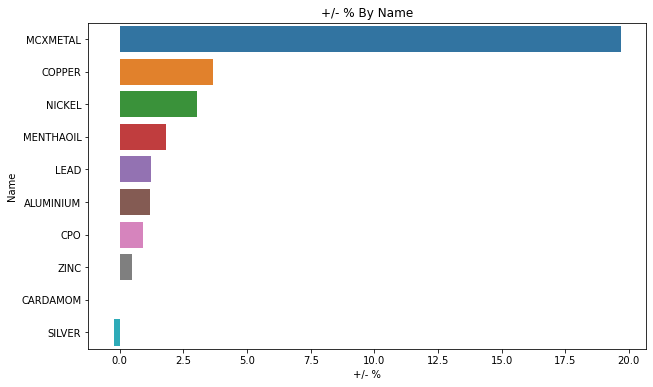

In [106]:
#+/- % by Name
print(data.groupby("Name")['+/- %'].sum().sort_values(ascending=False).reset_index().head(10))
datasub=data.groupby("Name")['+/- %'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="+/- %",y="Name",data=datasub).set(title="+/- % By Name")
plt.show()
#MCXMETAL 2102 has the maximum +/- % and MENTHAOIL 2103 has the lowest +/- %.


Expire Date
2021-02-15     0.00
2021-02-17    12.11
2021-02-19    -1.90
2021-02-23    -0.44
2021-02-24    -4.41
2021-02-26     5.53
2021-03-05    -0.36
2021-03-15     0.00
2021-03-19    -1.81
2021-03-22     7.58
2021-03-24    -6.52
2021-03-26    -0.05
2021-03-31     4.20
2021-04-05    -0.58
2021-04-30    -0.13
2021-05-05     0.01
2021-06-04    -0.33
Name: +/- %, dtype: float64


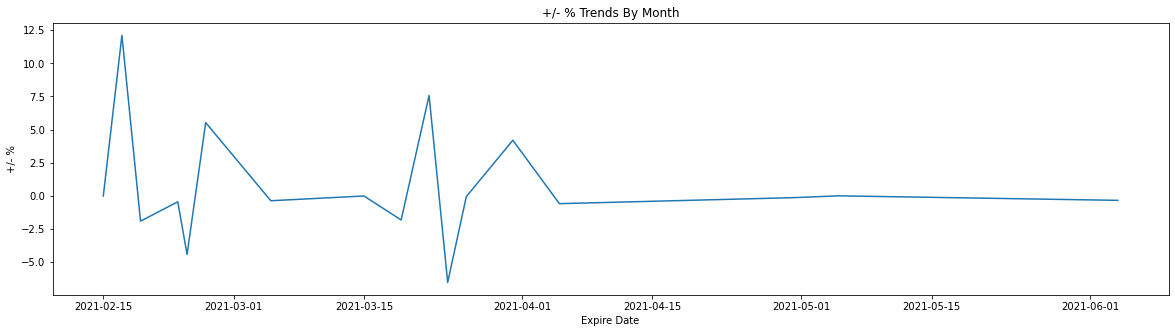

In [107]:
#+/- % fluctuation is the highest on 2021-02-17 and lowest on 2021-03-24
data["Expire Date"] = pd.to_datetime(data["Expire Date"]).dt.date
print(data.groupby("Expire Date")["+/- %"].sum())

datatend=data.groupby("Expire Date")["+/- %"].sum()
plt.figure(figsize=(20,5))
sns.lineplot(data=datatend).set(title="+/- % Trends By Month")
plt.ylabel=("+/- %")


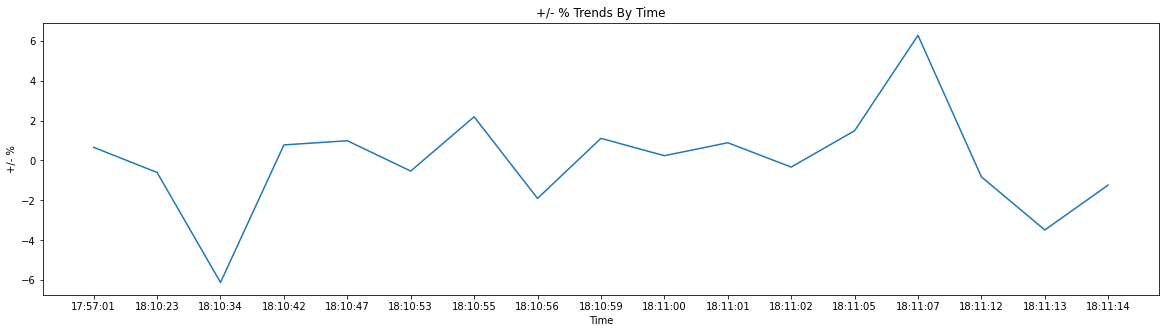

In [108]:
datatend=data.groupby("Time")["+/- %"].sum()
plt.figure(figsize=(20,5))
sns.lineplot(data=datatend).set(title="+/- % Trends By Time")
plt.ylabel=("+/- %")
#Interpretation:
#The +/- % is the lowest at 18:10:34 and +/- % is the highest at 18:11:07.

Name
SILVER          276041.00
GOLD            267176.00
SILVERMICRO     137923.00
MCXMCXCOMDEX     29429.00
MCXMETAL         29181.00
CRUDEOIL          8660.00
NICKEL            2826.00
CPO               2052.00
MENTHAOIL         1904.50
CARDAMOM          1455.00
COPPER            1338.75
ZINC               461.90
NATURALGAS         439.60
ALUMINIUM          346.25
LEAD               341.75
Name: Bid, dtype: float64


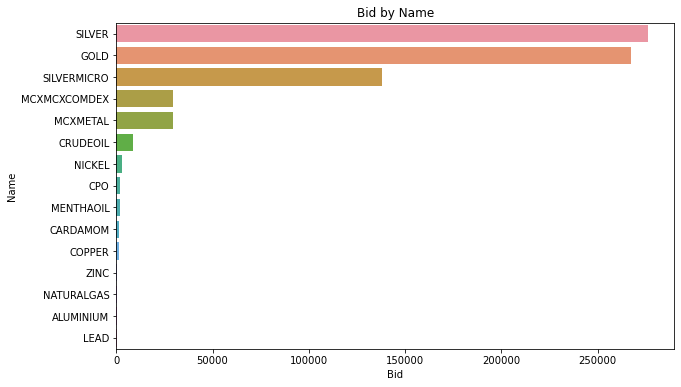

In [109]:
print(data.groupby("Name")['Bid'].sum().sort_values(ascending=False))
datacategory=data.groupby("Name")['Bid'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="Bid",y="Name",data=datacategory).set(title="Bid by Name")
plt.show()
#Interpretation:
#SILVER-M 2104 has the highest Bid which is 69603.00 
#and CARDAMOM 2103 has the lowest Bid.

Bid
224.00      154.0
4334.00      49.0
4326.00      17.0
215.60       12.0
227.80       10.0
37047.00     10.0
4607.00       8.0
68331.00      5.0
14825.00      4.0
46048.00      3.0
69603.00      3.0
174.00        3.0
174.05        3.0
45995.00      2.0
1408.30       2.0
1417.70       2.0
172.20        2.0
4567.00       2.0
14703.00      2.0
36873.00      2.0
234.10        2.0
952.50        1.0
69599.00      1.0
69592.00      1.0
68457.00      1.0
68382.00      1.0
46136.00      1.0
666.95        1.0
45903.00      1.0
1020.70       1.0
14726.00      1.0
14356.00      1.0
671.80        1.0
952.00        1.0
1455.00       1.0
1031.30       1.0
167.75        1.0
Name: Bid Vol, dtype: float64


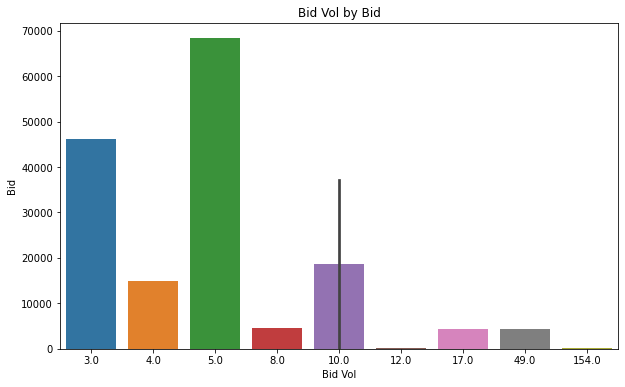

In [110]:
print(data.groupby("Bid")['Bid Vol'].sum().sort_values(ascending=False))
datacategory=data.groupby("Bid")['Bid Vol'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="Bid Vol",y="Bid",data=datacategory).set(title="Bid Vol by Bid")
plt.show()
#Bid is the highest when the bid volume is is 5.
#Bid is the lowest when the bid volume is 12 and 154 

<function matplotlib.pyplot.show(close=None, block=None)>

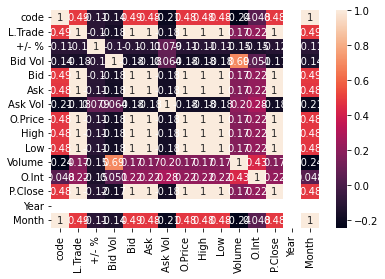

In [111]:
corr=data.corr()
import matplotlib.pyplot as plt
import seaborn as sb
corr=data.corr()
sb.heatmap(corr,annot=True)
plt.show
#The correlation between Bid Volume and Volume is the highest.
#which means if the bid volume changes by 1% then volume will also change by 0.969%.



In [112]:
groupby = data.groupby('code', axis=0)
  
groupby.mean()

#On the basis of average code the other values are plotted


,L.Trade,+/- %,Bid Vol,Bid,Ask,Ask Vol,O.Price,High,Low,Volume,O.Int,P.Close,Year,Month
code,,,,,,,,,,,,,,
2102.0,13620.481250,0.680625,12.375000,13616.409375,14430.73,10.600000,14411.080000,14475.616667,14273.996667,17845.333333,6156.733333,13595.078125,2021.0,2.0
2103.0,12983.363333,0.202667,6.933333,12982.680000,12986.95,4.333333,12941.716667,13025.843333,12883.210000,5411.066667,8305.266667,12287.296875,2021.0,3.0
2104.0,57816.000000,-0.177500,2.250000,57809.500000,57824.50,1.750000,57821.250000,58083.500000,57258.500000,12659.500000,13383.500000,57906.250000,2021.0,4.0
2105.0,69640.000000,0.010000,1.000000,69599.000000,69656.00,1.000000,68932.000000,69830.000000,68708.000000,862.000000,2664.000000,69631.000000,2021.0,5.0
2106.0,46142.000000,-0.330000,1.000000,46136.000000,46141.00,1.000000,46203.000000,46203.000000,46039.000000,73.000000,1991.000000,46295.000000,2021.0,6.0


In [113]:
data['Name'].is_unique

False

In [114]:
data['code'].is_unique

False

In [115]:
name_code = pd.DataFrame(data,columns=['Name','Code'])

In [116]:
name_code.head(57)

,Name,Code
0,MCXMETAL,NaN
1,MCXMETAL,NaN
2,NaN,NaN
3,MCXMCXCOMDEX,NaN
4,MCXMCXCOMDEX,NaN
5,NaN,NaN
6,ALUMINIUM,NaN
7,ALUMINIUM,NaN
8,NaN,NaN
9,CARDAMOM,NaN


In [117]:
name=data['Name']

In [118]:
gold=name.str.contains('GOLD')

In [119]:
gold

0     False
1     False
2       NaN
3     False
4     False
5       NaN
6     False
7     False
8       NaN
9     False
10    False
11      NaN
12    False
13    False
14      NaN
15    False
16    False
17      NaN
18    False
19    False
20      NaN
21     True
22     True
23      NaN
24     True
25     True
26      NaN
27     True
28     True
29      NaN
30     True
31     True
32      NaN
33    False
34    False
35      NaN
36    False
37    False
38      NaN
39    False
40    False
41      NaN
42    False
43    False
44      NaN
45    False
46    False
47      NaN
48    False
49    False
50      NaN
51    False
52    False
53      NaN
54    False
55    False
Name: Name, dtype: object

In [120]:
data.head(57)

,Name,Sub_Name,code,Expire Date,L.Trade,+/- %,Bid Vol,Bid,Ask,Ask Vol,O.Price,High,Low,Time,Volume,O.Int,P.Close,Year,Month
0,MCXMETAL,NaN,2102.0,2021-02-17,14358.00,12.11,1.0,14356.00,14357.00,25.0,14420.00,14420.00,14322.00,NaN,414.0,172.0,12807.00,2021.0,2.0
1,MCXMETAL,NaN,2103.0,2021-03-22,14826.00,7.58,4.0,14825.00,14831.00,5.0,14602.00,14846.00,14584.00,18:11:07,897.0,666.0,13781.00,2021.0,3.0
2,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MCXMCXCOMDEX,NaN,2102.0,2021-02-24,14708.00,-4.41,2.0,14703.00,14706.00,1.0,14610.00,14721.00,14610.00,18:11:13,1675.0,1774.0,15358.00,2021.0,2.0
4,MCXMCXCOMDEX,NaN,2103.0,2021-03-24,14728.00,-6.52,1.0,14726.00,14738.00,1.0,14700.00,14740.00,14645.00,18:10:34,96.0,288.0,15690.00,2021.0,3.0
5,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ALUMINIUM,NaN,2102.0,2021-02-26,174.05,0.78,3.0,174.05,174.15,2.0,171.55,174.30,171.15,18:10:42,1422.0,477.0,172.70,2021.0,2.0
7,ALUMINIUM,NaN,2103.0,2021-03-31,172.20,0.41,2.0,172.20,172.40,3.0,171.50,172.50,170.20,18:10:34,447.0,482.0,171.50,2021.0,3.0
8,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CARDAMOM,NaN,2102.0,2021-02-15,1500.00,0.00,1.0,1455.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.00,2021.0,2.0


In [121]:
name_code

,Name,Code
0,MCXMETAL,NaN
1,MCXMETAL,NaN
2,NaN,NaN
3,MCXMCXCOMDEX,NaN
4,MCXMCXCOMDEX,NaN
5,NaN,NaN
6,ALUMINIUM,NaN
7,ALUMINIUM,NaN
8,NaN,NaN
9,CARDAMOM,NaN


In [122]:
name_code.plot(x='Name',y='code',kind='hist')

KeyError: 'code'

In [ ]:

df2=(data[data.Ask<34911.925])

df2
df3 = pd.DataFrame(df2,columns=['code','O.Int','Ask','Name'])


In [ ]:
df3.plot(x='Name',y='Ask',kind='line',label="Filtered Ask value less than 34911.925")

In [ ]:
type(data.Name)

In [ ]:
data['Bid'] = data['Bid'].astype(float)
df4=(data[data.Volume>100])
df5 = pd.DataFrame(df4,columns=['L.Trade','Expire Date','Name'])

In [ ]:
combined_df = df3.merge(df5, on='Name',how='inner')

In [ ]:

combined_df

In [ ]:
combined_df.plot(x='Name',y='O.Int',kind='line')

In [ ]:
new_df=pd.concat([name_code,combined_df],axis=1)

In [ ]:
new_df

In [ ]:
new_df2=pd.concat([df2,df5],axis=1)

In [ ]:
new_df2

In [ ]:
new_df2.plot(x='Name',y='Volume',kind='line',label="Filtered Ask value less than 34911.925")

In [ ]:
new_df2=data[data.High<35177.075]

In [ ]:
new_df2

In [ ]:
datacat=new_df2.groupby("Name")['O.Price'].sum().sort_values(ascending=False).reset_index()  
plt.figure(figsize=(10,6))
sns.barplot(x="O.Price",y="Name",data=datacat).set(title="O.Price by Name for high<35177.075")
plt.show()

In [ ]:
datacata=new_df2.groupby("Ask Vol")['O.Price'].sum().sort_values(ascending=True).reset_index()  
plt.figure(figsize=(10,6))
sns.barplot(x="O.Price",y="Ask Vol",data=datacata).set(title="O.Price by Name for high<35177.075")
plt.show()

In [ ]:
mentions_fed = data["Name"].str.contains("GOLD")
type(mentions_fed)
mentions_fed

In [ ]:
mentions_fed.groupby(data["L.Trade"], sort=False).sum()

In [ ]:
mentions_fed

In [ ]:
correlations = data.corr(method='pearson')
print(correlations)

In [ ]:
#From the correlation data we can conclude that L.Trade and Highest trading price is highly positively correlated with each other.
#That means if L.trade increases then highest trading price will also increase and vice-versa.
#Bid price and ask price is highly correlated with the opening price.
#That means if the opening price is increasing then the Bid price and the ask price will also increase.
#Opening price is highly correlated with the Highest trade price and lowest trade price ad previously closing value.
#If the previously closing value is increased then the opening price will also increase.
#Previous closed value and L.Trade value is highly correlated that means if the Previous close value is increasing then the 
#L.Trade value will also increase.


In [225]:
path = "C://Users//reauter//Desktop//New folder (3)//Book2.csv"
dataset = pd.read_csv(path)
dataset.head()
#Data Preprocessing will be done with the help of following script lines
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:,1].values

In [226]:
#changing to categorical value
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)



[0 1 0 1 0 1 0 1 0 1 0 1 2 4 0 1 1 2 0 1 0 1 0 1 0 1 0 1 1 3 0 2 0 2 0 1]


In [227]:
#Next, we will divide the data into train and test split. The following code will split the dataset into 70% training data and 30% of testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [228]:
#Next, train the model with the help of RandomForestClassifier class of sklearn as follows
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [229]:
#At last, we need to make prediction. It can be done with the help of following script −
y_pred = classifier.predict(X_test)

In [230]:
#Next, print the results as follows −
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7 0 0]
 [0 3 0]
 [0 0 1]]
Classification Report:
              precision    recall  f1-score   support

        2102       1.00      1.00      1.00         7
        2103       1.00      1.00      1.00         3
        2104       1.00      1.00      1.00         1

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0


In [231]:
'''
What is the purpose of classification report?
A Classification report is used to measure the quality of predictions
from a classification algorithm. How many predictions are True and how many are False.
More specifically, True Positives, False Positives, True negatives and False Negatives 
are used to predict the metrics of a classification report as shown below.

Precision:- Accuracy of positive predictions.

Precision of code 2102,2103,2104 is 100%.

Recall:- Fraction of positives that were correctly identified.

100% of positives are correctly identified.


'''

'\nWhat is the purpose of classification report?\nA Classification report is used to measure the quality of predictions\nfrom a classification algorithm. How many predictions are True and how many are False.\nMore specifically, True Positives, False Positives, True negatives and False Negatives \nare used to predict the metrics of a classification report as shown below.\n\nPrecision:- Accuracy of positive predictions.\n\n\n'